In [33]:
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


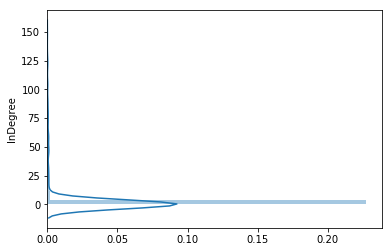

In [34]:
#read the graph with indegrees of april 15
df_15 = pd.read_csv("output/in_degrees_graph_20160415.csv")
sns.distplot(df_15["InDegree"], vertical=True)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


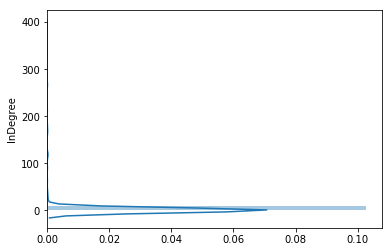

In [35]:
#read the graph with indegrees of april 17
df_17 = pd.read_csv("output/in_degrees_graph_20160417.csv")
sns.distplot(df_17["InDegree"], vertical=True)

In [43]:
#read the entire csv of events
df_eventos = pd.read_csv("../../eventos.csv", encoding = "ISO-8859-1", parse_dates=['FechaEvento'], infer_datetime_format=True)


143

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


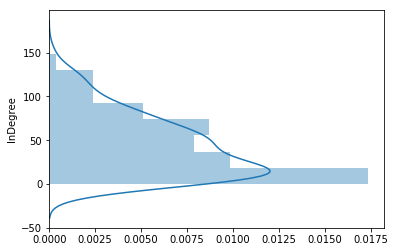

In [36]:
df_15 = df_15.rename(columns={"GeoId":"GeoIdEvento"})
#get just the item from april 15
df_eventos_abril_15 = df_eventos[(df_eventos["FechaEvento"] == pd.datetime(2016,4,15)) ]
#unify the data of the indegrees with the whole dataset
df = pd.merge(df_eventos_abril_15,df_15, how="inner", on="GeoIdEvento")
#takw just the columns we care, this are, indegree and id
df = df[["GeoIdEvento","InDegree"]]
#remember to drop duplicates, as there are a lot since for one tower there are various events
torres_eventos_15 = df.drop_duplicates()
sns.distplot(torres_eventos_15["InDegree"], vertical=True)

109


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


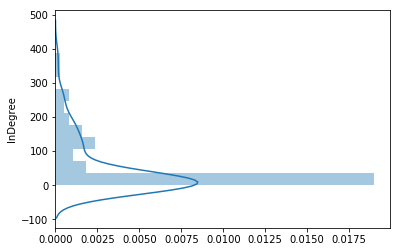

In [48]:

df_17 = df_17.rename(columns={"GeoId":"GeoIdEvento"})
#escojo los eventos que se dieron el 17
df_eventos_abril_17 = df_eventos[(df_eventos["FechaEvento"] == pd.datetime(2016,4,17)) ]

df = pd.merge(df_eventos_abril_17,df_17, how="inner", on="GeoIdEvento")
df = df[["GeoIdEvento","InDegree"]]
torres_eventos_17 = df.drop_duplicates()
print(torres_eventos_17["GeoIdEvento"].nunique())
sns.distplot(torres_eventos_17["InDegree"], vertical=True)


In [38]:
df.shape


(138223, 2)

In [39]:
#analizar in degree de grafo del 15
#degree_sequence = torres_eventos_15["InDegree"].tolist()
#degree_sequence = sorted(degree_sequence)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3e56190f0>],
      dtype=object)

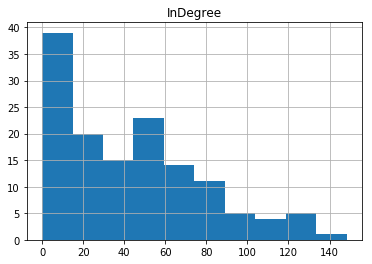

In [40]:
fig, ax = plt.subplots()
torres_eventos_15.hist(column='InDegree', ax=ax)
#ax.set_yscale('log')
#ax.set_xscale('log')


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


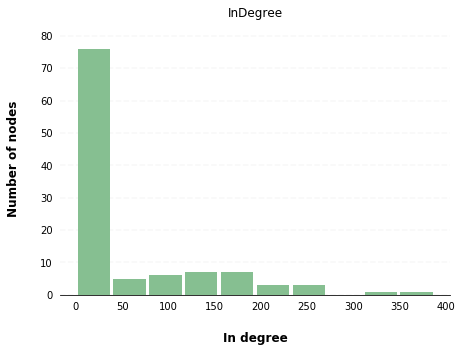

In [41]:
#analizar in degree del grafo del 17 , recordar que este tiene mas nodos
ax = torres_eventos_17.hist(column='InDegree', grid=False, figsize=(7,5), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    # Set x-axis label
    x.set_xlabel("In degree", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of nodes", labelpad=20, weight='bold', size=12)


In [58]:
#unificar en una columna la diferencia entre los indegrees, hay 139 torres para el 15 y 109 para el 17
torres_eventos_17 = torres_eventos_17.rename(columns={"InDegree":"InDegree_17"})
torres_eventos_15 = torres_eventos_15.rename(columns={"InDegree":"InDegree_15"})
data_15_17 = pd.merge(torres_eventos_15,torres_eventos_17,how="outer",on="GeoIdEvento")
data_15_17 = data_15_17.fillna(0)
data_15_17["InDegreeDifference"] = data_15_17["InDegree_17"]-data_15_17["InDegree_15"]
data_15_17.to_csv("./output/degree_difference.csv", encoding='utf-8', index=False)
data_15_17

,GeoIdEvento,InDegree_15,InDegree_17,InDegreeDifference
0,506,74.072138,230.255911,156.183773
1,411,121.447020,9.902759,-111.544261
2,412,61.403108,37.676400,-23.726708
3,468,92.429934,113.636507,21.206573
4,479,105.563225,27.154740,-78.408486
5,443,60.577628,0.000000,-60.577628
6,431,37.592184,2.181516,-35.410667
7,436,50.623748,1.920847,-48.702901
8,441,70.436606,0.000000,-70.436606
9,487,22.886893,2.053145,-20.833747
